In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
df = pd.read_csv("./Austin_Animal_Center_Outcomes.csv")
df.sample(5)

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
70004,A744317,Waffles,03/09/2017 04:16:00 PM,Mar 2017,03/05/2010,Return to Owner,NaN,Dog,Neutered Male,7 years,Chihuahua Shorthair Mix,Chocolate/Tan
80445,A812881,Coco Chanel,01/30/2020 02:09:00 PM,Jan 2020,01/30/2010,Euthanasia,Suffering,Dog,Spayed Female,10 years,Chihuahua Shorthair,Chocolate/Cream
40830,A741351,Toby,04/05/2022 01:29:00 PM,Apr 2022,12/31/2015,Transfer,Partner,Dog,Neutered Male,6 years,Pointer Mix,White/Black
98429,A744581,*Solo,04/13/2017 12:59:00 PM,Apr 2017,02/09/2017,Adoption,Foster,Cat,Intact Male,2 months,Domestic Shorthair Mix,Brown Tabby/White
77768,A772220,NaN,05/25/2018 06:08:00 PM,May 2018,03/16/2018,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black


Text(0.5, 1.0, 'date of birth')

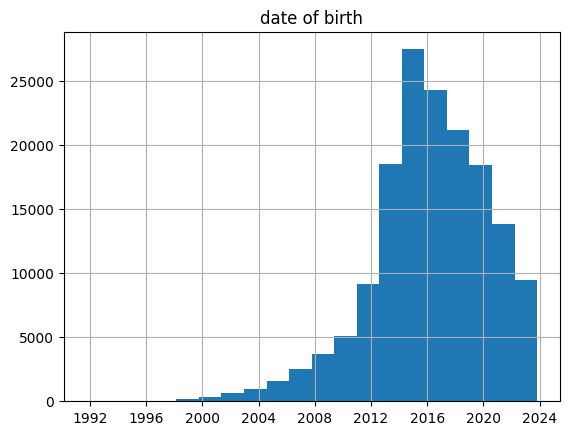

In [3]:
#age histogram (total population graph)
dobs = df["Date of Birth"]
dobs = pd.to_datetime(dobs, format="%m/%d/%Y")
dobs.hist(bins=20)
plt.title("date of birth")

태어난 년도에 따른 인구(?) 분포

C:\Users\Unmanned System\AppData\Local\Temp\ipykernel_1936\3769866267.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  euthanasia_animals["Date of Birth"] = pd.to_datetime(euthanasia_animals["Date of Birth"], format="%m/%d/%Y")


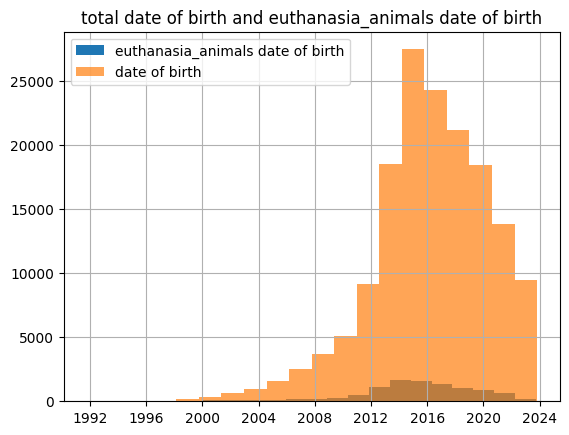

In [4]:
# total date of birth and euthanasia_animals date of birth
euthanasia_animals = df[df["Outcome Type"] == "Euthanasia"]
euthanasia_animals["Date of Birth"] = pd.to_datetime(euthanasia_animals["Date of Birth"], format="%m/%d/%Y")
euthanasia_animals["Date of Birth"].hist(bins=20, label="euthanasia_animals date of birth")
dobs = df["Date of Birth"]
dobs = pd.to_datetime(dobs, format="%m/%d/%Y")
dobs.hist(bins=20, alpha=0.7, label="date of birth")
plt.title("total date of birth and euthanasia_animals date of birth")
plt.legend()
plt.show()

전체 태어난 인구(주황색)과 안락사 당한 동물의 시각화  
이 그래프를 봤을 때 안락사 당한 수에 비해 압도적으로 들어온 동물이 많음   
따라서, 히스토그램 `bin`에 대해 `안락사 인구/들어온 인구` 를 확인하여 트랜드를 확인    


Text(0.5, 1.0, 'euthanasia rate vs Year of Birth')

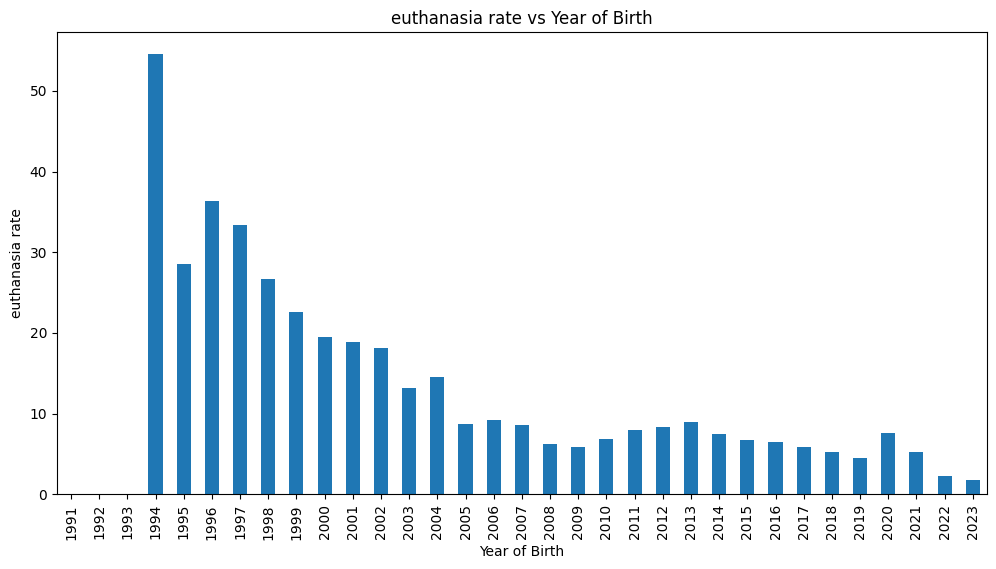

In [5]:
import matplotlib.dates as mdates

dobs_vc = dobs.value_counts()
eas_vc = euthanasia_animals["Date of Birth"].value_counts()

percentage = (eas_vc/dobs_vc) * 100
percentage = percentage.fillna(0)

percentage_year = percentage.groupby(pd.Grouper(freq='Y')).mean()
percentage_year.index = percentage_year.index.year.astype(str)
percentage_year.plot(kind='bar', figsize=(12, 6))
plt.xlabel("Year of Birth")
plt.ylabel("euthanasia rate")
plt.title("euthanasia rate vs Year of Birth")

늙을 수록 안락사 비율이 높고,  
어릴 수록 안락사 되지 않는 비율이 높음

C:\Users\Unmanned System\AppData\Local\Temp\ipykernel_1936\354323324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adopted["Date of Birth"] = pd.to_datetime(adopted["Date of Birth"], format="%m/%d/%Y")


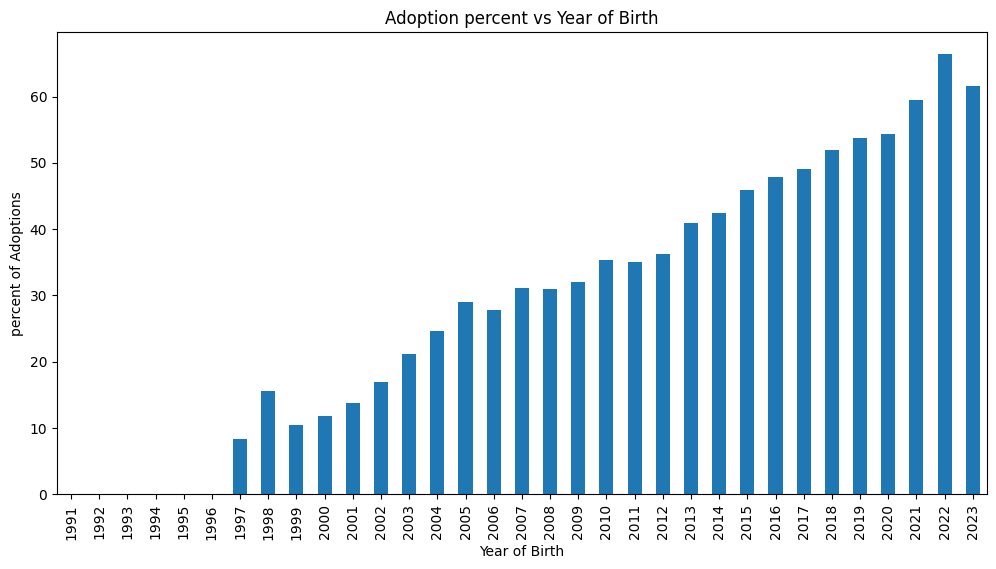

In [6]:
adopted = df[df["Outcome Type"] =="Adoption"]
adopted["Date of Birth"] = pd.to_datetime(adopted["Date of Birth"], format="%m/%d/%Y")
adopted_vc = adopted["Date of Birth"].value_counts()

dob_vc = dobs.value_counts()

percentage_vc = (adopted_vc/dob_vc)*100
percentage_vc = percentage_vc.fillna(0)

per_vc_year =percentage_vc.groupby(pd.Grouper(freq="Y")).mean()
per_vc_year.index = per_vc_year.index.year.astype(str)

per_vc_year.plot(kind="bar", figsize=(12,6))
# print(per_vc_year.sample(5))

plt.title('Adoption percent vs Year of Birth')
plt.xlabel('Year of Birth')
plt.ylabel('percent of Adoptions')
plt.show()

입양 되는 비율도 직관적인 생각과 비슷함  
어릴수록 입양되는 비율이 높고,  
늙을수록 입양되는 비율이 낮음.  

## 견종에 따른 입양 선호도 분석

In [7]:
df.sample(3)

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
106663,A669983,Susie,01/02/2014 12:55:00 PM,Jan 2014,12/31/2007,Return to Owner,NaN,Dog,Spayed Female,6 years,Beagle/Catahoula,Black/Blue Tick
73720,A763837,*Natasha,01/31/2018 01:27:00 PM,Jan 2018,10/05/2017,Adoption,Foster,Cat,Spayed Female,3 months,Domestic Medium Hair Mix,Orange Tabby
31848,A691675,NaN,11/12/2014 05:59:00 PM,Nov 2014,11/12/2013,Adoption,NaN,Dog,Spayed Female,1 year,Australian Kelpie Mix,Black/Tan


Text(0.5, 1.0, 'top20 breeds Abandoned')

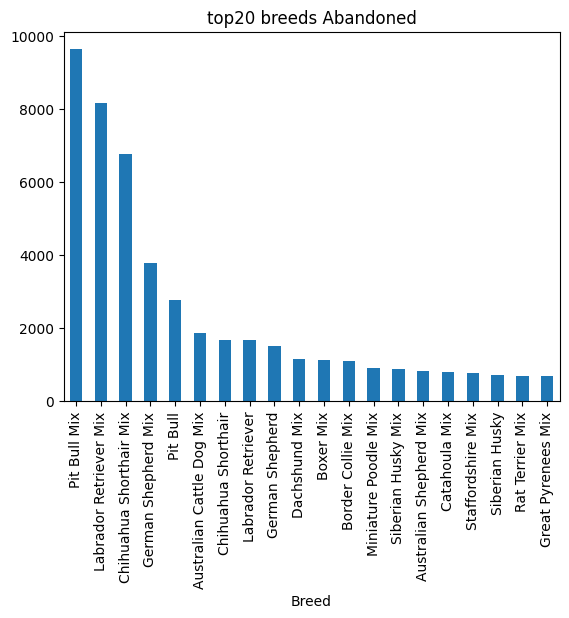

In [23]:
dogs_df = df[df["Animal Type"] == "Dog"]
dogs_breeds = dogs_df.groupby("Breed").size()
top20_dogs_breeds = dogs_breeds.sort_values(ascending=False).head(20)
top20_dogs_breeds.plot(kind="bar", label="Abandoned")
plt.title("top20 breeds Abandoned")

Text(0.5, 1.0, 'top20 breeds Adopted')

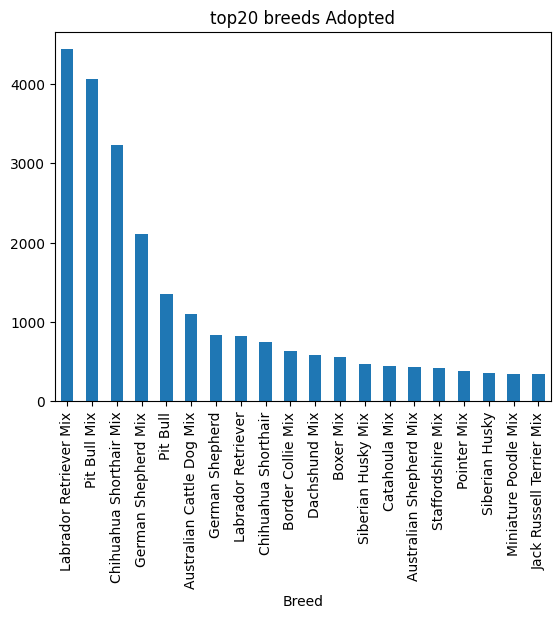

In [22]:
dogs_df = df[df["Animal Type"] == "Dog"]
dogs_df = dogs_df[dogs_df["Outcome Type"] == "Adoption"]
dogs_breeds = dogs_df.groupby("Breed").size()
top20_dogs_breeds = dogs_breeds.sort_values(ascending=False).head(20)
top20_dogs_breeds.plot(kind="bar", label="Adopted")
plt.title("top20 breeds Adopted")
# dogs_breeds.plot(kind="bar")